In [14]:
from ladder_dynamism.ladder import Ladder, Node
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
def draw_hist(N, S, M):
    arr = []
    count = 0
    while count < M:
        ttt = time.time()
        
        h = np.random.permutation(N)
        v = np.random.permutation(N)
        l = Ladder()
        nodes = [Node(i, l) for i in range(N)]

        for i, t in enumerate(h):
            nodes[i].hori_connect(nodes[t])

        for i, t in enumerate(v):
            nodes[i].vert_connect(nodes[t])
        
        try:
            l.fix()
        except AssertionError:
            continue

        # print(f"until ready: {time.time() - ttt}")
        ttt = time.time()
        
        arr.append(l.dynamism(S))
        
        # print(f"until calc: {time.time() - ttt}")
        count += 1

    plt.hist(arr, bins='auto')  # arguments are passed to np.histogram
    plt.title("Histogram with 'auto' bins")
    plt.show()

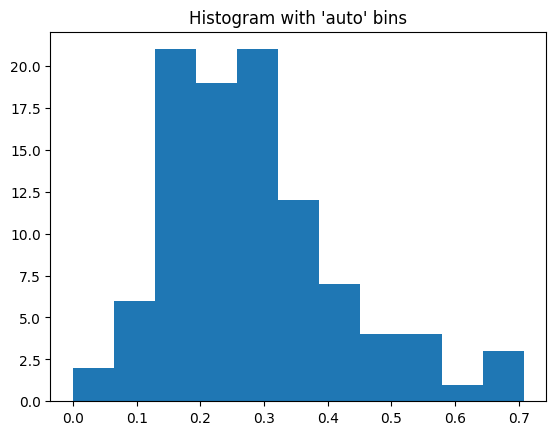

In [16]:
draw_hist(10, 43, 100)

In [17]:
def draw_dyna(ladder, S):
    plt.plot(range(1, S + 1), ladder.dynamisms(S))

In [18]:
def draw_random_dyna(N, S):
    while True:
        h = np.random.permutation(N)
        v = np.random.permutation(N)
        l = Ladder()
        nodes = [Node(i, l) for i in range(N)]

        for i, t in enumerate(h):
            nodes[i].hori_connect(nodes[t])

        for i, t in enumerate(v):
            nodes[i].vert_connect(nodes[t])
        
        try:
            l.fix()
        except AssertionError:
            continue
        
        break
    draw_dyna(l, S)
    return l

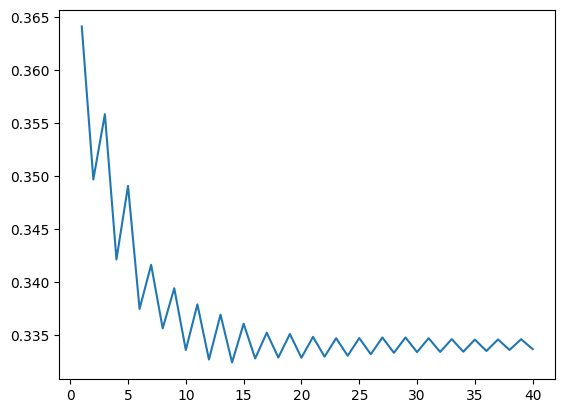

In [19]:
l = draw_random_dyna(30, 40)

In [23]:
def get_hori(ladder):
    return [node.hori_after.node_id for node in ladder.nodes.values()]

def get_vert(ladder):
    return [node.vert_after.node_id for node in ladder.nodes.values()]

In [24]:
get_hori(l)

[0,
 27,
 5,
 28,
 21,
 1,
 19,
 18,
 12,
 4,
 8,
 7,
 6,
 22,
 13,
 11,
 16,
 14,
 10,
 17,
 9,
 15,
 24,
 2,
 29,
 25,
 20,
 3,
 26,
 23]

In [25]:
get_vert(l)

[6,
 16,
 7,
 2,
 17,
 3,
 15,
 26,
 20,
 4,
 21,
 11,
 1,
 19,
 10,
 27,
 22,
 23,
 24,
 0,
 18,
 8,
 9,
 5,
 28,
 12,
 25,
 29,
 13,
 14]

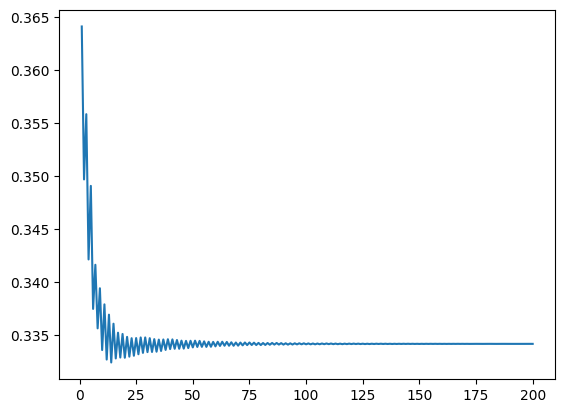

In [26]:
draw_dyna(l, 200)